#### 安裝套件

In [99]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn import preprocessing, linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV
sns.set()
sns.set_palette("hls", 8)

#### method

- 輸出模型準確率和繪製混淆矩陣

In [100]:
def output(model,x_train,y_train,S_test) :    
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(S_test, y_test)
    print("Training Accuracy:",accuracy_train)
    print("Testing Accuracy:",accuracy_test)
    y_pred = model.predict(S_test)
    cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['0', '1'],
                yticklabels=['0', '1'],
                annot=True,fmt='g',ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

#### 載入訓練集

In [175]:
col = ["ID","Default","SP500","TreasuryRate","DTDLevel","DTDTrend","CashTALevel","CashTATrend"
      ,"NITALevel","NITATrend","SizeLevel","SizeTrend","MB","SIGMA","MediaSentimentScore"]
train = pd.read_excel("2808x15.xlsx",header = None)
train.columns = col
train.head()

,ID,Default,SP500,TreasuryRate,DTDLevel,DTDTrend,CashTALevel,CashTATrend,NITALevel,NITATrend,SizeLevel,SizeTrend,MB,SIGMA,MediaSentimentScore
0,29914,0,0.105748,5.781667,2.991237,-0.304599,0.005914,-0.000994,0.008041,0.003846,-6.169169,0.007151,1.486400,0.036054,1.498164
1,28534,0,0.080355,0.143333,2.774796,-0.190453,0.001935,-0.000613,0.013437,-0.022110,-4.645193,-0.303917,2.358707,0.122560,1.098612
2,30383,0,-0.233859,1.064167,6.639440,-0.426534,0.120863,-0.061333,0.019804,-0.004771,-3.567252,0.001180,1.949723,0.086757,1.386294
3,31500,0,0.060460,3.265000,10.520049,1.675419,0.078752,0.048442,0.067335,-0.002979,-5.213275,-0.050929,7.015260,0.087311,2.079442
4,28432,0,-0.180336,1.369167,7.599402,-2.004519,0.229821,0.028242,0.035658,0.002757,1.685995,-0.024760,5.117003,0.050768,1.194506


#### 載入測試集

In [176]:
test = sio.loadmat("test") 
test = pd.DataFrame(test["new"])
test.columns = col
comp = pd.concat([train,test])
test.head()

,ID,Default,SP500,TreasuryRate,DTDLevel,DTDTrend,CashTALevel,CashTATrend,NITALevel,NITATrend,SizeLevel,SizeTrend,MB,SIGMA,MediaSentimentScore
0,29914.0,0.0,0.061827,0.305167,4.923900,-1.624164,0.015848,0.011049,0.004482,-0.000320,-5.700290,0.033461,0.981776,0.106913,0.597253
1,28534.0,0.0,0.215487,0.034833,5.975118,-2.911236,0.005365,0.002699,0.013425,-0.010326,-3.801586,-0.439577,3.603628,0.095247,0.693147
2,30383.0,0.0,0.212359,0.038667,14.246041,1.020533,0.175501,-0.035221,0.025523,0.006765,-2.506526,-0.029810,3.274125,0.033265,1.945910
3,29443.0,0.0,0.062598,0.025167,1.915331,-0.873294,0.114398,-0.015987,-0.063591,0.057003,-7.290181,-0.896490,1.500431,0.214144,2.754568
4,31264.0,0.0,0.162887,0.050000,3.349041,0.146269,0.196154,0.004205,0.011779,-0.003595,-2.991021,0.159933,1.459570,0.074337,0.366204


In [177]:
x = comp.iloc[:,2:]
y = comp.iloc[:,1]

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y,test_size=0.2 ,random_state=426)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2965, 13) (2965,)
(742, 13) (742,)


In [234]:
comp.Default.value_counts() 

0.0    3008
1.0     699
Name: Default, dtype: int64

# 資料EDA

- 違約與未違約比例 (訓練集:測試集)

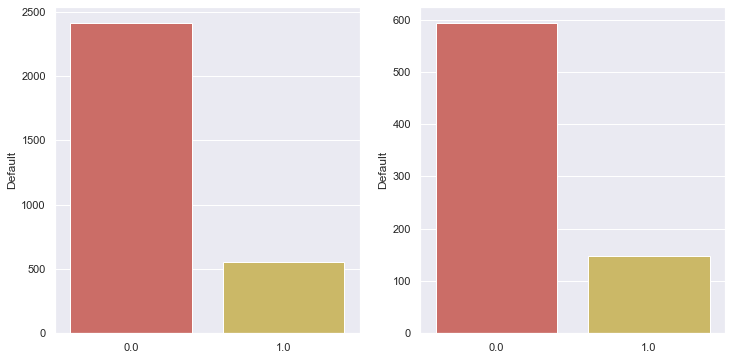

In [179]:
plt.figure(figsize=(12,6))
plt.subplot(121)
dtablefortrain = pd.DataFrame(y_train,columns = ['ID','Default']).Default.value_counts() 
sns.barplot(dtablefortrain.index, dtablefortrain)
plt.subplot(122)
dtablefortest = pd.DataFrame(y_test,columns = ['ID','Default']).Default.value_counts()
sns.barplot(dtablefortest.index, dtablefortest)

- 違約與未違約公司總體環境素質 (訓練集:測試集)

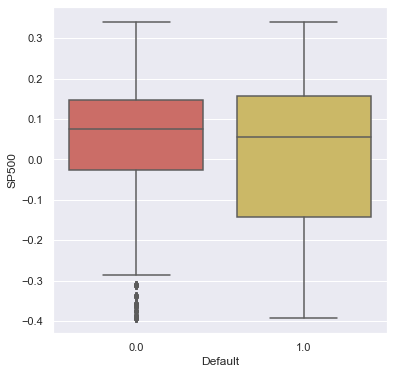

In [180]:
plt.figure(figsize=(6,6))
sns.boxplot("Default" , "SP500" ,data = comp) 

- 違約與未違約公司媒體情指標 (訓練集:測試集)

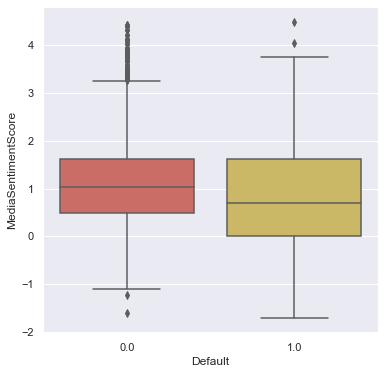

In [181]:
plt.figure(figsize=(6,6))
sns.boxplot("Default" , "MediaSentimentScore" ,data = comp) 

- 公司成長趨勢與媒體情感指標以違約與否分類

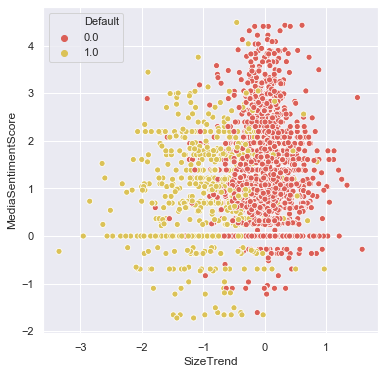

In [182]:
plt.figure(figsize=(6,6))
sns.scatterplot("SizeTrend", "MediaSentimentScore","Default",data=comp)

- 各變數相關性

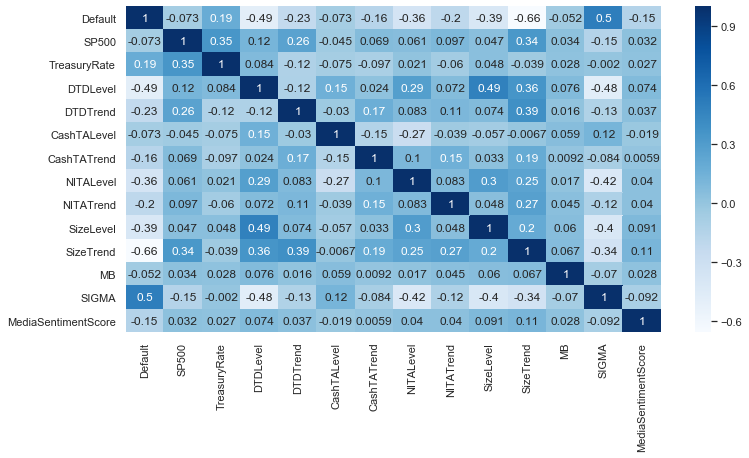

In [183]:
cor = train.iloc[:,1:].corr() 
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Blues',annot=True)

# 建立模型

## Logistic

In [184]:
from sklearn import preprocessing, linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [185]:
logistic_regr = linear_model.LogisticRegression(C = 100,penalty='l2',random_state=87, class_weight={0: 0.5, 1: 0.5}, solver='newton-cg')
%time logistic_regr.fit(x_train,y_train)

CPU times: user 96 ms, sys: 4.3 ms, total: 100 ms
Wall time: 58.8 ms


LogisticRegression(C=100, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=87, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
logistic=linear_model.LogisticRegression(random_state=87, class_weight={0: 0.5, 1: 0.5}, solver='newton-cg')
hyperparameters={"C":np.logspace(-3,3,7)} 
clf=GridSearchCV(logistic, hyperparameters, cv=5, scoring='recall')
best_model=clf.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 100.0}


In [187]:
model= linear_model.LogisticRegression(C = 100, penalty='l2', random_state=87) 
scores_accuracy = cross_val_score(model, x_train, y_train, cv=5,scoring='accuracy')
scores_auc = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc')
print("Cross-validated scores:", scores_accuracy)
print('average score_accuracy: {}'.format(scores_accuracy.mean()))
print('average score_auc: {}'.format(scores_auc.mean()))

Cross-validated scores: [0.95286195 0.9460371  0.96458685 0.95784148 0.95777027]
average score_accuracy: 0.9558195306298174
average score_auc: 0.9784583827755396


Training Accuracy: 0.9564924114671164
Testing Accuracy: 0.954177897574124


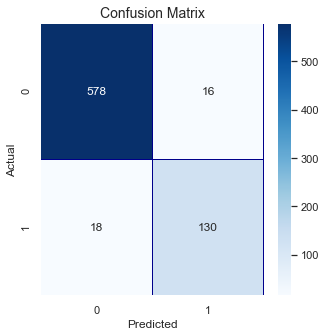

In [188]:
output(logistic_regr,x_train,y_train,x_test)

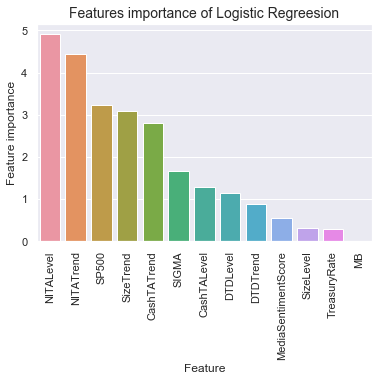

In [195]:
log=np.reshape(abs(logistic_regr.coef_ ), (-1,))
predictors= col[2:]
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': log})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (6,4))
plt.title('Features importance of Logistic Regreesion',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## SVM

In [196]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True,random_state=87)

In [197]:
%time svm.fit(x_train,y_train)

CPU times: user 464 ms, sys: 7.7 ms, total: 472 ms
Wall time: 514 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=87,
    shrinking=True, tol=0.001, verbose=False)

Training Accuracy: 0.9564924114671164
Testing Accuracy: 0.9393530997304582


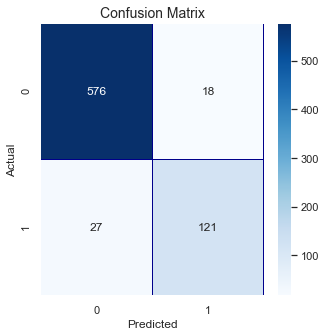

In [198]:
output(svm,x_train,y_train,x_test)

## KNN

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
knn = KNeighborsClassifier(n_neighbors=60)
%time knn.fit(x_train,y_train)

CPU times: user 3.95 ms, sys: 8.55 ms, total: 12.5 ms
Wall time: 15.8 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [237]:
KnnClassifier = KNeighborsClassifier(n_neighbors=1)
hyperparameters={"n_neighbors":np.arange(20,100,10)} 
clf=GridSearchCV(KnnClassifier, hyperparameters, cv=5, scoring='recall')
best_model=clf.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 60}


Training Accuracy: 0.9331084879145587
Testing Accuracy: 0.9299191374663073


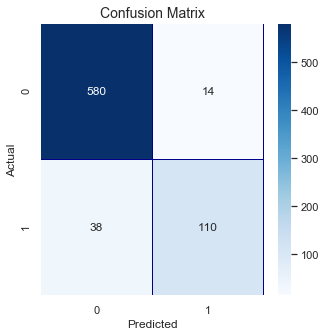

In [238]:
output(knn,x_train,y_train,x_test)

## Random Forest

In [199]:
from sklearn import ensemble

In [202]:
forest = ensemble.RandomForestClassifier(n_estimators = 400, max_features='auto', random_state=87, max_depth=6)
%time forest.fit(x_train,y_train)

CPU times: user 1.62 s, sys: 22.2 ms, total: 1.64 s
Wall time: 1.8 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=87, verbose=0,
                       warm_start=False)

In [201]:
RandomForestClassifier=ensemble.RandomForestClassifier(max_features='auto', random_state=87)
hyperparameters={"n_estimators":np.arange(100,700,100),
                "max_depth":np.linspace(4,6,3)} 
clf=GridSearchCV(RandomForestClassifier, hyperparameters, cv=5, scoring='recall')
best_model=clf.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 6.0, 'n_estimators': 400}


Training Accuracy: 0.9716694772344013
Testing Accuracy: 0.9501347708894878


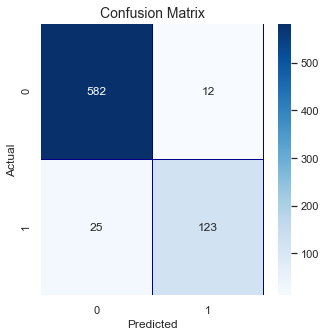

In [203]:
output(forest,x_train,y_train,x_test)

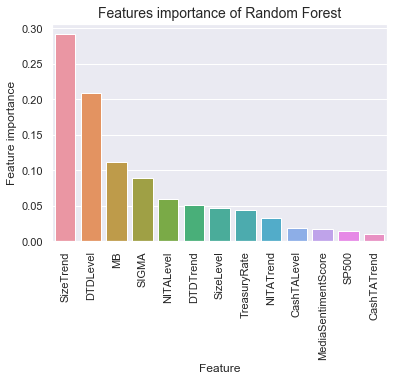

In [205]:
predictors= col[2:]
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': forest.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (6,4))
plt.title('Features importance of Random Forest',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## XGBOOST

In [206]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [210]:
xgb_class = XGBClassifier(random_state=87, n_estimators=60 , max_depth=4, subsample=0.9)
%time xgb_class.fit(x_train,y_train)

CPU times: user 279 ms, sys: 4.93 ms, total: 283 ms
Wall time: 293 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=87,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [208]:
xGBClassifier= XGBClassifier(random_state=87, subsample=0.9)
hyperparameters={"n_estimators":np.arange(20,100,20),
                 "max_depth" : np.arange(4,6,1)} 
clf=GridSearchCV(xGBClassifier, hyperparameters, cv=5, scoring='recall')
best_model=clf.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 4, 'n_estimators': 60}


In [211]:
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

Training Accuracy: 0.9811129848229342
Testing Accuracy: 0.954177897574124


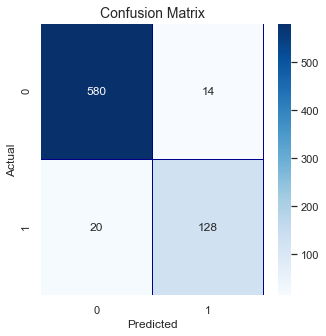

In [212]:
output(xgb_class,x_train,y_train,x_test)

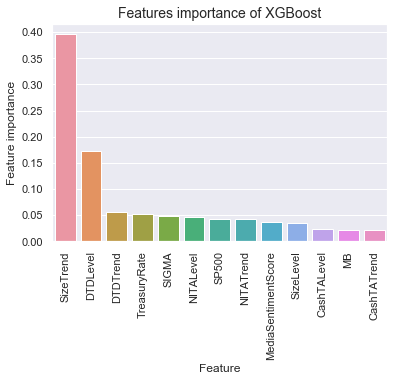

In [213]:
predictors= col[2:]
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': xgb_class.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (6,4))
plt.title('Features importance of XGBoost',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## 各模型相關性

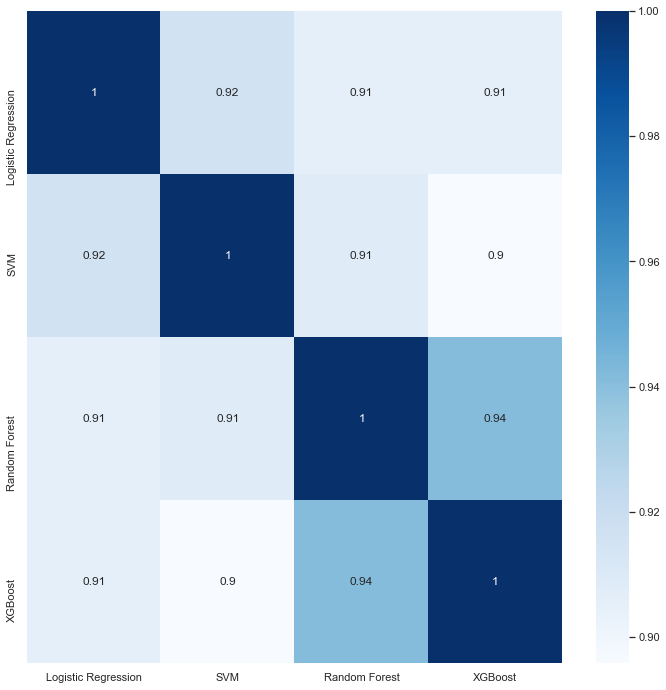

In [214]:
models = {"Logistic Regression":logistic_regr,"SVM":svm,"Random Forest":forest,"XGBoost":xgb_class}
def modelcor(modeldict,x):
    predictable = np.zeros((len(x),0))
    for i in modeldict:
        predict = modeldict[i].predict(x)
        predictable = np.column_stack((predictable,predict))
    predictable = pd.DataFrame(predictable)
    predictable.columns = models.keys()
    cor = predictable.corr() 
    plt.figure(figsize=(12,12))
    sns.heatmap(cor,cmap='Blues',annot=True)
modelcor(models,x_train)

## Stacking

In [215]:
from vecstack import stacking

- 第一層

In [216]:
stackmodel1st = [    
    SVC(kernel='rbf', probability=True), 
    ensemble.RandomForestClassifier(n_estimators = 400, max_features='auto', random_state=87, max_depth=6), 
    XGBClassifier(random_state=87, n_estimators=60, max_depth=4, subsample=0.9),
]

In [217]:
%time S_train , S_test = stacking(stackmodel1st, x_train, y_train, x_test, regression=False, mode='oof_pred_bag', needs_proba=True, save_dir=None, n_folds=5, stratified=True, shuffle=True, random_state=87, verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVC]
    fold  0:  [0.16291832]
    fold  1:  [0.15530273]
    fold  2:  [0.20308254]
    fold  3:  [0.15011742]
    fold  4:  [0.15274895]
    ----
    MEAN:     [0.16483399] + [0.01959639]
    FULL:     [0.16483742]

model  1:     [RandomForestClassifier]
    fold  0:  [0.14761811]
    fold  1:  [0.15866500]
    fold  2:  [0.15897084]
    fold  3:  [0.13601461]
    fold  4:  [0.14670796]
    ----
    MEAN:     [0.14959530] + [0.00856553]
    FULL:     [0.14959561]

model  2:     [XGBClassifier]
    fold  0:  [0.13028010]
    fold  1:  [0.13207665]
    fold  2:  [0.14638072]
    fold  3:  [0.11119059]
    fold  4:  [0.11716210]
    ----
    MEAN:     [0.12741803] + [0.01231253]
    FULL:     [0.12742245]

CPU times: user 9.95 s, sys: 167 ms, total: 10.1 s
Wall time: 11 s


- 第二層

In [218]:
stackmodel2nd  =linear_model.LogisticRegression(C=100, penalty='l2',random_state=87, solver='newton-cg', class_weight={0: 0.5, 1: 0.5})
%time stackmodel2nd.fit(S_train,y_train)

CPU times: user 31.4 ms, sys: 2.56 ms, total: 34 ms
Wall time: 23.1 ms


LogisticRegression(C=100, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=87, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
loglin = linear_model.LogisticRegression(penalty='l2',random_state=87, solver='newton-cg', class_weight={0: 0.5, 1: 0.5})
hyperparameters={"C":np.logspace(-3,3,7)} 
clf=GridSearchCV(loglin, hyperparameters, cv=5, scoring='recall')
best_model=clf.fit(S_train,y_train)
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 100.0}


Training Accuracy: 0.9524451939291737
Testing Accuracy: 0.9555256064690026


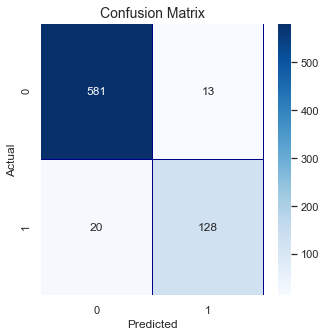

In [220]:
output(stackmodel2nd,S_train,y_train,S_test)

## Blending

### 拆分訓練集驗證集

In [221]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4,random_state=426)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)                                         

(1779, 13) (1779,)
(1186, 13) (1186,)


### SVM

In [222]:
bsvm = SVC(kernel='rbf', probability=True)
bsvm.fit(x_train,y_train)
predict_svm = bsvm.predict_proba(x_val)

### RandomForest

In [223]:
bforest = ensemble.RandomForestClassifier(n_estimators = 400, max_features='auto', random_state=87, max_depth=6) 
bforest.fit(x_train,y_train) 
predict_forest = bforest.predict_proba(x_val)

### XGBoost

In [224]:
bxgb_class = XGBClassifier(n_estimators=60, random_state=87, max_depth=4, subsample=0.9)
bxgb_class.fit(np.array(x_train),y_train)
predict_xgb = bxgb_class.predict_proba(np.array(x_val))

### 集合特徵

In [225]:
B_train=np.concatenate((predict_xgb,predict_svm,predict_forest),axis=1)
print(B_train.shape,Bs_train.shape)

(1186, 6) (1186, 6)


### 測試集經過第一層模型

In [226]:
x_test2=np.array(x_test)
test_svm = bsvm.predict_proba(x_test2)
test_xgb = bxgb_class.predict_proba(x_test2)
test_forest = bforest.predict_proba(x_test2)
B_test=np.concatenate((test_xgb,test_svm,test_forest),axis=1)
print(B_test.shape)

(742, 6)


### Logistic(第二層)

In [229]:
blogistic_regr= linear_model.LogisticRegression(C=1, penalty='l2',random_state=87, class_weight={0: 0.5, 1: 0.5})
%time blogistic_regr.fit(B_train,y_val)

CPU times: user 3.36 ms, sys: 1.48 ms, total: 4.85 ms
Wall time: 5.07 ms


LogisticRegression(C=1, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=87, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
loglinb = linear_model.LogisticRegression(penalty='l2',random_state=87, solver='newton-cg', class_weight={0: 0.5, 1: 0.5})
hyperparameters={"C":np.logspace(-3,3,7)} 
clf=GridSearchCV(loglinb, hyperparameters, cv=5, scoring='recall')
best_model=clf.fit(B_train,y_val)
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1.0}


Training Accuracy: 0.948566610455312
Testing Accuracy: 0.9514824797843666


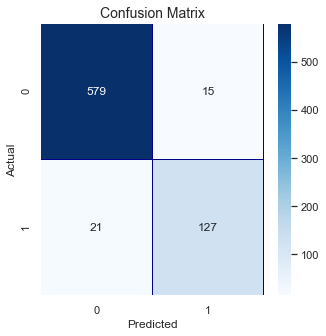

In [230]:
output(blogistic_regr,B_train,y_val,B_test)

# 各模型ROC

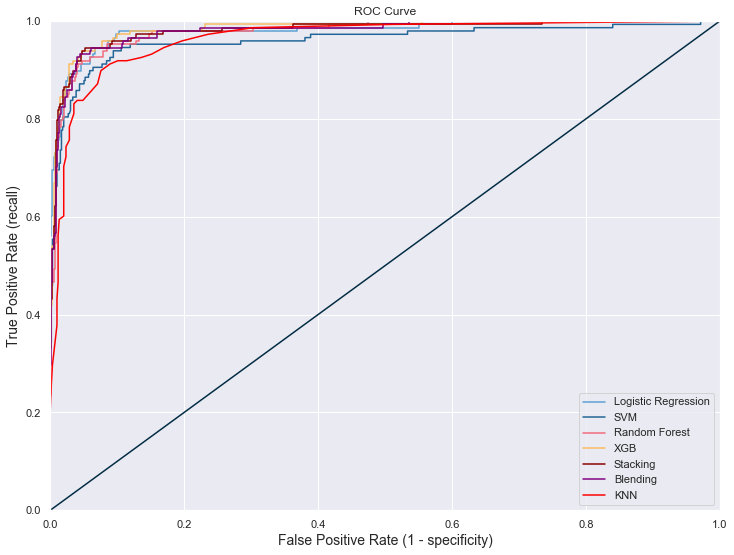

In [239]:
from sklearn.metrics import roc_curve, auc

y_pred_proba1 = logistic_regr.predict_proba(x_test)[:, 1]
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba1)
plt.figure(figsize=(12,9))
plt.plot(fpr1, tpr1, color='#5ca0d3', label='Logistic Regression')

y_pred_proba2 = svm.predict_proba(x_test)[:, 1]
[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred_proba2)
plt.plot(fpr2, tpr2, color='#226597', label='SVM')

y_pred_proba3 = forest.predict_proba(x_test)[:, 1]
[fpr3, tpr3, thr3] = roc_curve(y_test, y_pred_proba3)
plt.plot(fpr3, tpr3, color='#f36a7b', label='Random Forest')

y_pred_proba4 = xgb_class.predict_proba(x_test)[:, 1]
[fpr4, tpr4, thr4] = roc_curve(y_test, y_pred_proba4)
plt.plot(fpr4, tpr4, color='#fabc60', label='XGB')

y_pred_proba5 = stackmodel2nd.predict_proba(S_test)[:, 1]
[fpr5, tpr5, thr5] = roc_curve(y_test, y_pred_proba5)
plt.plot(fpr5, tpr5, color='#880000', label='Stacking')

y_pred_proba6 = blogistic_regr.predict_proba(B_test)[:, 1]
[fpr6, tpr6, thr6] = roc_curve(y_test, y_pred_proba6)
plt.plot(fpr6, tpr6, color='#800080', label='Blending')

y_pred_proba7 = knn.predict_proba(x_test)[:, 1]
[fpr7, tpr7, thr7] = roc_curve(y_test, y_pred_proba7)
plt.plot(fpr7, tpr7, color='#FF0000', label='KNN')

plt.plot([0, 1], [0, 1],color='#022c43')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [253]:
from operator import itemgetter
rocdict = [{'name': "Logistic Regresision", 'AUC': auc(fpr1, tpr1)},
                 {'name': "Random Forest", 'AUC': auc(fpr3, tpr3)},
                 {'name': "SVM", 'AUC': auc(fpr2, tpr2)},
                 {'name': "XGBoost", 'AUC': auc(fpr4, tpr4)}, 
                 {'name': "KNN",'AUC': auc(fpr7, tpr7)},
                 {'name': "Stacking",'AUC': auc(fpr5, tpr5)},
                 {'name': "Blending",'AUC': auc(fpr6, tpr6)}
                ]
rocdict.sort(key=itemgetter('AUC'))
for idx,model in enumerate(rocdict):
    print("AUC of",model["name"],":",model["AUC"])

AUC of SVM : 0.9605571480571481
AUC of KNN : 0.9641516516516517
AUC of Random Forest : 0.9785239785239785
AUC of Blending : 0.9794567294567295
AUC of Stacking : 0.98004823004823
AUC of Logistic Regresision : 0.980059605059605
AUC of XGBoost : 0.9836768586768586
